分類問題
機械学習ライブラリscikit-learnの活用

このライブラリは、教師あり学習のアルゴリズムを効率的かつ生産的に利用することを目的として、ユーザーフレンドリなインターフェースを提供している

# 3.1 分類アルゴリズムの選択

特定の問題に適した分類アルゴリズムを選択するには、練習が必要である
特徴量やサンプルの個数、データベースでのノイズの量、そしてクラスの線形分離可能性に関して違いがあるかもしれない

結局のところ、分類器の性能（予測力と計算能力）は、学習に利用可能なデータに大きく依存する<br>
機械学習のアルゴリズムのトレーニングは、次に示す主要な5つの手順で構成される<br>
<h>
    1.特徴量を選択し、トレーニングサンプルを収集する<br>
    2.性能指標を選択する<br>
    3.分類器と最適化アルゴリズムを選択する<br>
    4.モデルの性能を評価する<br>
    5.アルゴリズムを調整する<br>

# 3.2 scikit-learn活用へのファーストステップ：パーセプトロンのトレーニング

150個のサンプルの「がく片の長さ」と「花びらの長さ」を特徴行列Xに代入し、対応する品種のクラスラベルをベクトルyに代入する

In [3]:
from sklearn import datasets
import numpy as np
# Irisデータセットをロード
iris = datasets.load_iris()
# 3,4列目の特徴量を抽出
X = iris.data[:, [2, 3]]
# クラスレベルを取得
y = iris.target
# 一意なクラスラベルを出力
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


np.unique(y)は、iris.targetに格納されている一意なクラスレベルを3つ返している<br>
アヤメの花のクラス名であるIris-setosa、Iris-versicolor、Iris-virginicaがすでに整数（0，1，2）として格納されていることが分かる

トレーニングしたモデルの性能を未知のデータで評価するために、データセットをさらにトレーニングデータセットとテストデータセットに分割する

In [4]:
from sklearn.model_selection import train_test_split
# トレーニングデータとテストデータに分割
# 全体の30％をテストデータにする
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

scikit-learnのmodel_selectionモジュールのtrain_test_split関数を使用して、X配列とy配列を30％のテストデータ（45個のサンプル）と70％のトレーニングデータ（105個のサンプル）にランダムに分割している.<br>
なお、train_test_split関数は、データセットを分割する前にトレーニングセットを内部でシャッフルする.<br>
そうしないと、クラス0とクラス1のサンプルがトレーニングセットに追加され、テストセットがクラス2の45個のサンプルで構成されることになってしまう.<br>
ここでは、random_stateパラメータを通じて、内部の疑似乱数生成器に固定の乱数シード（random_state=1）を指定している.<br>
この乱数生成器は、データセットを分割する前のシャッフルに使用される

stratify=yを指定することで、組み込み機能としてサポートされている層化サンプリングを利用している

この場合の層化サンプリングセットは、train_test_split関数から返されるトレーニングサブセットとテストサブセットに含まれているクラスレベルの比率が入力データセットと同じであることを意味する

実際にそうなっている事を確認したい場合は、NumPyのbincount関数を使用できる<br>
この関数は、配列内の各値の出現回数を数える機能を提供する

In [5]:
print('Labels counts in y:', np.bincount(y))

Labels counts in y: [50 50 50]


In [6]:
print('Labels counts in y_train:', np.bincount(y_train))

Labels counts in y_train: [35 35 35]


In [7]:
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y_test: [15 15 15]


機械学習と最適化の多くのアルゴリズムでは、最適な性能を得るために特徴量のスケーリングも必要<br>
ここでは、scikit-learnのpreprocessingモジュールのStandardScalerクラスを使って特徴量を標準化する

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# トレーニングデータの平均と標準偏差を計算
sc.fit(X_train)
# 平均と標準偏差を用いて標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

このコードは、StandardScalerクラスをpreprocessingモジュールから読み込み、StandardScalerクラスの新しいインスタンスを変数scに代入している<br>
次に、StandardScalerのfitメソッドを呼び出すことで、トレーニングデータから特徴量ごとにパラメータµ（平均値）とσ（標準偏差）を推定<br>
続いて、transformメソッドを呼び出し、推定されたパラメータµとσを使ってトレーニングデータを標準化している<br>
テストデータを標準化するのに同じスケーリングパラメータを使用したことに注意<br>
これはトレーニングデータセットとテストデータセットの値を相互に比較できるようにする

トレーニングデータセットを標準化したところで、パーセプトロンモデルをトレーニングできる状態となる<br>
scikit-learnのほとんどのアルゴリズムは、多クラス分類をデフォルトでサポートしている<br>
これには一対他（OvR）手法が使用されるため、3つの品種のクラスをパーセプトロンに同時に与えることができる

In [9]:
from sklearn.linear_model import Perceptron
# エポック数40、学習率0.1でパーセプトロンのインスタンスを生成
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=1)
# トレーニングデータをモデルに適応させる
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=1, shuffle=True,
      verbose=0, warm_start=False)

linear_modelモジュールからPerceptronクラスを読み込んだ後、Perceptronの新しいインスタンスを初期化してから、fitメソッドを使ってモデルをトレーニングしている<br>
この場合、パラメータn_iterはエポック数（データセットのトレーニング回数）を定義する<br>

適切な学習率を割り出すには、ある程度の実験が必要である<br>
学習率が高すぎれば、アルゴリズムはコストの大局的最小値を飛び越えてしまう<br>
学習率が低すぎれば、アルゴリズムの収束に必要なエポックが増えてしまう<br>
特に大きなデータセットでは、それにより学習の効率が低下する恐れがある<br>
また、エポックごとにトレーニングデータセットの並べ替えを実現できるよう、random_stateパラメータを使用している

In [10]:
# テストデータで予測を実施
y_pred = ppn.predict(X_test_std)
# 誤分類のサンプルの個数を表示
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 3


このコードを実行すると、パーセプトロンが45個のサンプルのうち３つを誤分類することが分かる

scikit-learnでは、さまざまな性能指標を計算する機能も実装されている<br>
それらはmetricsモジュールより提供される<br>
たとえば、テストデータセットでのパーセプトロンの正解率は、次のように計算できる

In [11]:
from sklearn.metrics import accuracy_score
# 分類の正解率を表示
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.93


ここで、y_testは真のクラスレベルであり、y_predは以前に予測したクラスレベルである<br>
あるいは、scikit-learnの各分類器に定義されているscoreメソッドを使用することもできる<br>
このメソッドは、predict呼び出しを先のaccuracy_scoreと組み合わせることで、分類器の正解率を計算する

In [12]:
print('Accuracy: %.2f' % ppn.score(X_test_std, y_test))

Accuracy: 0.93


最後に、前章で説明したplot_decision_regions関数を使用して、トレーニングしたばかりのパーセプトロンモデルの決定領域をプロットし、さまざまな品種のサンプルをどの程度識別できるのかを可視化してみる

In [13]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # マーカーとカラーマップ
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # 各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=cl,
                   edgecolor='black')
        
    # テストサンプルを目立たせる（点を○で表示）
    if test_idx:
        # 全てのサンプルをプロット
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                   c='',
                   edgecolor='black',
                   alpha=1.0,
                   linewidth=1,
                   marker='o',
                   s=100,
                   label='test set')

plot_decision_regions関数を少し修正したおかげで（コードの太字部分）、目立たせたいs何プルをインデックスで指定できるようななった<br>
この関数を使ってデータをプロットするコードは次のようになる

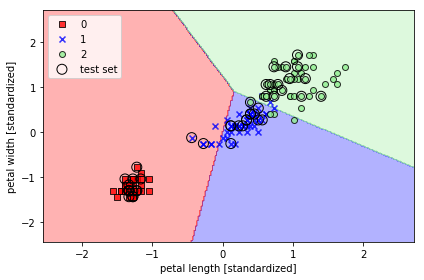

In [14]:
# トレーニングデータとテストデータの特徴量を行方向に結合
X_combined_std = np.vstack((X_train_std, X_test_std))
# トレーニングデータとテストデータのクラスラベルを結合
y_combined = np.hstack((y_train, y_test))
# 決定境界のプロット
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn,
                     test_idx=range(105,150))
# 軸のラベル設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')

# 凡例の設定（左上に配置）
plt.legend(loc='upper left')

# グラフを表示
plt.tight_layout()
plt.show()

結果として得られたグラフからわかるように、3つの品種を線形の決定境界で完全に区切ることはできない

前章で述べたように、完全な線形分離が不可能なデータセットでは、パーセプトロンアルゴリズムは決して収束しない<br>
パーセプトロンアルゴリズムが一般に実務のデータ解析で推奨されないのは、そのためである

# 3.3 ロジステック回帰を使ってクラスの確立を予測するモデルの構築

パーセプトロンの学習規則は、分類を目的とした機械学習のアルゴリズムを試してみる分には悪くないが、最大の問題点は、クラスを完全に線形分離できない場合は決して収束しないことである<br>
その理由としてすぐに思い当たるのは、エポックごとに誤分類されるサンプルが少なくとも1つあるために、重みが絶えず更新されてしまうことである<br>
もちろん、学習率を変更してエポックの数を増やすことは可能だが、このデータセットではパーセプトロンが決して収束しないことに注意

ここからはロジステック回帰についてみていく<br>
ロジステック回帰は線形分類問題と二値分類問題に対する単純ながらより強力なアルゴリズムであり、その名前とは裏腹に、回帰ではなく分類のためのモデルである

# 3.3.1 ロジステック回帰の直観的知識と条件付確率

ロジステック回帰は分類モデルであり、非常に実装しやすいものの、高い性能が発揮されるのは線形分離可能なクラスに対してのみである<br>
パーセプトロンやADALINEと同様に、本書で取り上げるロジステック回帰モデルは二値分類のための線形モデルでもあり、たとえば一対他（OvR）手法に基づいて多クラス分類モデルとして拡張される

ロジステック回帰の概念を理解するために、まずオッズ比（odds ratio）からみていく<br>
オッズ比は事象の起こりやすさを表すもので、$\frac{p}{(1-p)}$と書くことができる．この場合、pは正事象の確立を表す<br>
正事象は必ずしも「良い」ことを意味するわけではなく、患者に疾患がある確率など、予測したい事象を表す<br>
正事象については、クラスラベルy = 1として考えることができる<br>
その場合は、ロジット関数を定義できる<br>
この関数は単にオッズ比の対数（対数オッズ）となる<br>
<div style="text-align: center;">
$logit(p)=log{\frac{p}{(1-p)}}$
</div>
コンピュータサイエンスの慣例に従い、この場合の「対数」は自然対数を表すことに注意<br>
ロジット関数は、0よりも大きく1よりも小さい範囲の入力値を受け取り、それらの次数の全範囲の値に変換する<br>
この関数を使って、特徴量の値と対数オッズとの間の線形関係を表すことができる<br>
<div style="text-align: center;">
$logit(p(y=1|x))=w_0x_0+w_1x_1+...+w_mx_m=\sum_{i=0}^{m}w_ix_i=w^Tx$
</div>
ここでp(y=1|x))は、特徴量xから与えられた場合にサンプルがクラス1に属するという条件付き確率である

ここで実際に関心があるのは、サンプルが特定のクラスに属している確率を予測することである<br>
これはロジット関数の逆関数であり、ロジステックしぐも井戸関数とも呼ばれる<br>
その特徴的なS字形により、単にシグモイド関数と呼ばれることもある
<div style="text-align: center;">
$φ(z)=\frac{1}{1+e^{-z}}$
</div>
この場合のzは総入力である<br>
つまり、重みとサンプルの特徴量との線形結合であり、次のように計算できる<br>
<div style="text-align: center;">
$z = w^Tx = w_0x_0 + w_1x_1 + ... + w_mx_m$
</div>

-7以上7未満の範囲にある値のシグモイド関数をプロットしてみる

In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
#シグモイド関数を定義
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

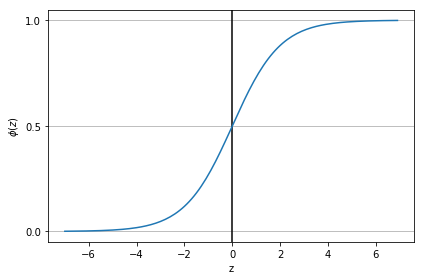

In [17]:
# 0.1間隔で-7以上7未満のデータを生成
z = np.arange(-7, 7, 0.1)

# 生成したデータでシグモイド関数を実行
phi_z = sigmoid(z)

# 元データとシグモイド関数の出力をプロット
plt.axvline(0.0, color='k')

# y軸の上限/下限を設定
plt.plot(z, phi_z)

# 軸のラベルを設定
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y軸の目盛りを追加
plt.yticks([0.0, 0.5, 1.0])

# Axesクラスのオブジェクトの取得
ax = plt.gca()

# y軸の目盛りに合わせて水平グリッド線を追加
ax.yaxis.grid(True)

# グラフを表示
plt.tight_layout()
plt.show()

ロジステック回帰モデルに対する直観を養うために、前章で説明したADALINEの実装と関連付けてみる<br>
ADALINEの実装では、高等関数φ(z) = zを活性化関数として使用した<br>
ロジステック回帰では、先ほど定義したシグモイド関数が活性化関数になる<br>

実際のところ、多くのアプリケーションでは、予測されるクラスラベルに関心があるだけでなく、クラスの所属関係の確率（閾値計算を適用する前のシグモイド関数の出力）を見積もることが特に有益となる

# 3.3.2 ロジステック関数の重みの学習

ロジステック回帰モデルを使って確率とクラスラベルを予測する方法について説明したところで、たとえば重みwといったモデルのパラメータを結合させる方法について説明する<br>
前章では、誤差平方和（SSE）のコスト関数を定義した<br>
そして、ADALINEの分類モデルの重みwを学習するために、この関数を最小化した<br>
ロジステック回帰のコスト関数を導き出す方法について説明するために、データセットのサンプルがお互いに独立していると仮定して、まずロジステック回帰モデルの構築時に最大化したい尤度Lを定義する

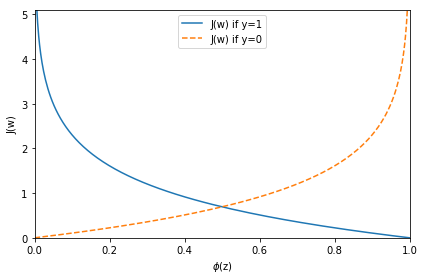

In [18]:
# y=1のコストを計算する関数
def cost_1(z):
    return - np.log(sigmoid(z))

# y=0のコストを計算する関数
def cost_0(z):
    return - np.log(1 - sigmoid(z))

# 0.1間隔で-10以上10未満のデータを生成
z = np.arange(-10, 10, 0.1)

# シグモイド関数を実行
phi_z = sigmoid(z)

# y=1のコストを計算する関数を実行
c1 = [cost_1(x) for x in z]

# 結果をプロット
plt.plot(phi_z, c1, label='J(w) if y=1')

# y=0のコストを計算する関数を実行
c0 = [cost_0(x) for x in z]

# 結果をプロット
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

# x軸とy軸の上限/下限を設定
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])

# 軸のラベルを設定
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')

# 凡例を設定
plt.legend(loc='upper center')

# グラフを表示
plt.tight_layout()
plt.show()

結果として表示されたグラフは、x軸の範囲[0, 1]でシグモイド活性化関数を表しており、y軸で関連するロジステック回帰のコストを表している<br>
シグモイド関数への入力は範囲[-10, 10]のz値である

サンプルがクらる1に属していることを正しく予測した場合は、コストが0に地下ずくことが分かる<br>
同様に、y=0である(サンプルがクラス0に属している)ことを正しく予測した場合は、y軸のコストも0に近づくことが分かる<br>
ただし、予測が間違っていた場合、コストは無限大に向かう<br>
要するに、予測を間違えたら徐々にコストを引き上げることで、ペナルティを科すわけである

# 3.3.3 ADALINE実装をロジステック回帰アルゴリズムに変換する

ロジステック回帰を独自に実装する場合は、前章のADALINE実装のコスト関数Jを新しいコスト関数に置き換えるだけでよい<br>
これにより、トレーニングサンプルを全て分類するコストがエポックごとに計算されるようになる<br>
また、線形活性化関数をシグモイド活性化関数に置き換える必要もある  
さらに、閾値関数を書き換えて、-1と1の代わりにクラスラベル0と1を返すようにする必要もある  
ADALINEのコードにこれら3つの変更を加えると、次に示すように、有効なロジステック回帰実装が得られる

In [31]:
class LogisticRegressionGD(object):
    """ 勾配降下法に基づくロジステック回帰分析
    
    パラメータ
    -------------
    eta : float
        学習率（0.0より大きく1.0以下の値）
    n_iter : int
        トレーニングデータのトレーニング回数
    random_state : int
        重みを初期化するための乱数シード
        
    属性
    ---------
    w_ : 1次元配列
      適合後の重み
    cost_ : リスト
    　各エポックでの誤差二乗和コスト関数
     
     """
    
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        # 学習率の初期化
        self.eta = eta
        # トレーニング回数の初期化
        self.n_iter = n_iter
        # 乱数シードを固定化するrandom_state
        self.random_state = random_state
        
    def fit(self, X, y):
        """ トレーニングデータに適合させる
        
        パラメータ
        -------------
        X : { 配列のような構造}, shape = {n_samples, n_features}
            トレーニングデータ
            n_samplesはサンプルの個数、n_featuresは特徴量の個数
        y : 配列のようなデータ構造、shape = [n_samples]
            目的変数
            
        戻り値
        -------------
        self : object
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        # トレーニング回数分トレーニングデータを反復処理
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # 誤差平方和のコストではなくロジステック回帰のコストを計算することに注意
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            # エポックごとのコスト格納
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        """ロジステックシグモイド活性化関数を計算"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # 以下に等しい:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

ロジステック回帰モデルを適合させるにあたり、そのモデルがうまくいくのは二値分類タスクに限られることを覚えておく必要がある  
そこで、品種としてIris-Setosa(クラス0)とIris-Versicolor(クラス1)のみを考慮することで、ロジステック回帰の実装を確認してみる

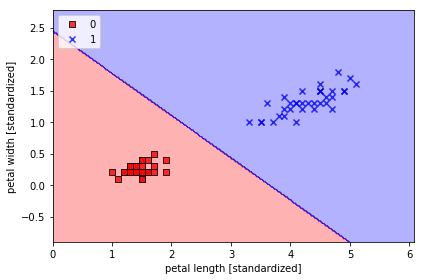

In [33]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

# ロジステック回帰インスタンスを生成
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)

# モデルをトレーニングデータに適合させる
lrgd.fit(X_train_01_subset, y_train_01_subset)

# 決定領域をプロット
plot_decision_regions(X=X_train_01_subset,
                    y=y_train_01_subset,
                    classifier=lrgd)

# 軸のラベルを設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')

# 凡例を設定（左上に配置）
plt.legend(loc='upper left')

# グラフを表示
plt.tight_layout()
plt.show()

# 3.3.4 scikit-learnを使ったロジスティック回帰モデルのトレーニング

ADALINEとロジステック回帰の概念的な違いを理解するために役立つ有益なコーディングと数学演算を行ったところで、scikit-learnを使って最適なロジステック回帰を実装する方法について見てみよう  
この実装では、多クラス分類の設定も標準でサポートされている(デフォルトではOvR)

次のコードはsklearn.linear_model.LogisticRegressionクラスとお馴染みのfitメソッドを使用して、3つのクラスに分類できる標準化されたトレーニングデータセットにより、モデルのトレーニングを行う

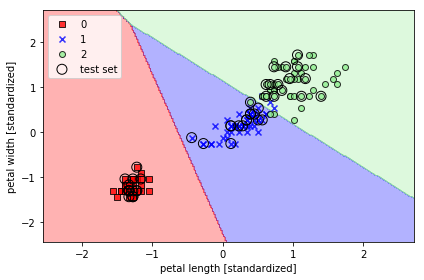

In [35]:
from sklearn.linear_model import LogisticRegression

# ロジステック回帰のインスタンスを生成
lr = LogisticRegression(C=100.0, random_state=1)

# トレーニングデータをモデルに適合させる
lr.fit(X_train_std, y_train)

# 境界線をプロット
plot_decision_regions(X_combined_std, y_combined, classifier=lr,
                     test_idx=range(105,150))

# 軸のラベルを設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')

# 凡例を設定（左上に配置）
plt.legend(loc='upper left')

# グラフを表示
plt.tight_layout() # グラフが重ならないように調整
plt.show()

トレーニングデータにモデルを適合させたら、決定境界、トレーニングサンプル、テストサンプルをプロットした  

LogisticRegressionクラスのモデルのトレーニングに使用したコード（上記コードの3行目）を見て、「この謎のパラメータCは何か」と思っているかもしれない  
このパラメータについてはすぐに説明するが、まず、過学習と正規化の概念を次項で簡単に説明する  
だがその前に、クラスの所属関係の確率についての説明を完了させる

トレーニングサンプルが特定のクラスに属する確率は、predict_probaメソッドを使って計算できる  
例えば、テストセットの最初の3つのサンプルの確率は次のように予測できる

In [41]:
lr.predict_proba(X_test_std[:3,:])

array([[  3.20136878e-08,   1.46953648e-01,   8.53046320e-01],
       [  8.34428069e-01,   1.65571931e-01,   4.57896429e-12],
       [  8.49182775e-01,   1.50817225e-01,   4.65678779e-13]])

一行目は、1つ目のサンプルに関するクラスの所属確率を表しており、2行目は、2つ目のサンプルに関するクラスの所属確率を表している  
予想した通り、これらの列を合計すると1になることが分かる  
1行目において最も大きい値は約0.853であり、1つ目のサンプルがクラスの3(Iris-Virginica)に属している確率をこのモデルが85.3％と予測したことを意味している  
既に気づいているかもしれないが、クラスレベルの予測値を取得するには、各行において最も大きい列を指定すればいい  
これには、たとえばNumPyのargmax関数を使用できる

In [42]:
lr.predict_proba(X_test_std[:3,:]).sum(axis=1)

array([ 1.,  1.,  1.])

In [43]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

返されたクラスラベルは上のようになる（これらは順にIris-Setosa、Iris-Versicolor、Iris-Virginicaに対応している）

この条件付確率からクラスラベルの取得は、当然ながら、predictメソッドの直接呼出しを単に手作業で行ったものである

In [44]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

最後に、単一のサンプルのクラスラベルを予測したい場合に注意しなければならない点が1つある  
それは、scikit-learnがデータ入力として2次元配列を期待することである  
このため最初に1行のデータを2次元のデータ配列に変換する必要がある  
1行のデータを2次元配列に変換する方法の一つは、NumPyのreshapeメソッドを使って新しい次元を追加することである

In [45]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

# 3.3.5 正則化による過学習への対処